In [45]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
StreamSize = 100000
ReservoirSize = 1000
lamda = 1e-5

In [32]:
r1 = [None] * ReservoirSize
for i in range(ReservoirSize):
    r1[i] = i
for i in range(ReservoirSize, StreamSize):
    p = float(ReservoirSize) / (i + 1)
    if p > random.random():
        index = random.randint(0, ReservoirSize - 1)
        r1[index] = i

In [35]:
plt.figure(figsize = [6, 6])
plt.plot(r1, 'bo')
plt.title('Unbiased Data Distribution')
plt.xlabel('Reservoir Position')
plt.ylabel('Data Timestamp')
plt.savefig('/Users/lmh/Downloads/scatter.png')

In [44]:
r1.sort()
plt.figure(figsize = [6, 6])
plt.plot(r1, 'bo')
plt.title('Unbiased Data Distribution')
plt.xlabel('Reservoir Position')
plt.ylabel('Data Timestamp')
plt.show()

In [40]:
n = round(1 / lamda)
r2 = []
for i in range(StreamSize):
    l = len(r2)
    p = l / n
    if p > random.random():
        index = random.randint(0, l - 1)
        r2[index] = i
    else:
        r2.append(i)
r2.sort()

In [48]:
plt.figure(figsize = [6, 6])
plt.plot(r2, 'ro')
plt.title('Biased Data Distribution')
plt.xlabel('Reservoir Position')
plt.ylabel('Data Timestamp')
plt.show()

In [84]:
p_in = ReservoirSize * lamda
r3 = []
l3_record = [0] * 10000
for i in range(StreamSize):
    p_base = random.random()
    l = len(r3)
    if i < 10000:
        l3_record[i] = l / float(ReservoirSize)
    if p_in > p_base:
        p = l / ReservoirSize
        if p > p_base:
            index = random.randint(0, l - 1)
            r3[index] = i
        else:
            r3.append(i)
r3.sort()

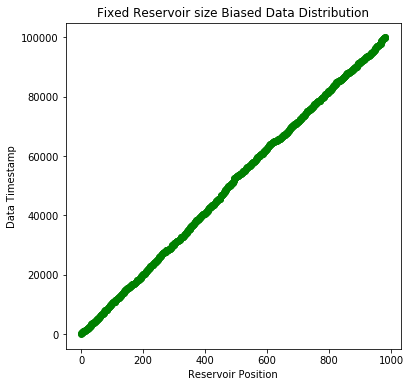

In [55]:
plt.figure(figsize = [6, 6])
plt.plot(r3, 'go')
plt.title('Fixed Reservoir size Biased Data Distribution')
plt.xlabel('Reservoir Position')
plt.ylabel('Data Timestamp')
plt.show()

In [85]:
p_in = 1
q = 1.0 / ReservoirSize
r4 = []
l4_record = [0] * 10000
for i in range(StreamSize):
    l = len(r4)
    if i < 10000:
        l4_record[i] = l / float(ReservoirSize)
    if l == ReservoirSize:
        p_in *= (1 - q)
        index = random.randint(0, l - 1)
        del r4[index]
        l -= 1
    if p_in > random.random():
        p = l / ReservoirSize
        if p > random.random():
            index = random.randint(0, l - 1)
            r4[index] = i
        else:
            r4.append(i)
r4.sort()

In [75]:
plt.figure(figsize = [6, 8])
axis = np.arange(ReservoirSize)
plt.plot(axis, r1, 'b', r4, 'y')
plt.title('Variable Reservoir Sampling VS. Unbiased')
plt.xlabel('Reservoir Position')
plt.ylabel('Data Timestamp')
plt.legend(['Unbiased', 'Biased'])
plt.show()

In [87]:
plt.figure(figsize = [6, 6])
plt.plot(l3_record, '--', l4_record, '-')
plt.xlabel('PROGRESSION OF STREAM (POINTS)')
plt.ylabel('FRACTIONAL RESERVOIR UTILIZATION')
plt.legend(['FIXED RESERVOIR SAMPLING', 'VARIABLE RESERVOIR SAMPLING'])
plt.show()